# Housing price modelling in King County, USA

In this script we consider data classification problem. In our dataset we have variable 'price_bin' with values 0 and 1. Value of 0 means certain house is <=\\$1 mln worth, value 1 means it is > \\$1 mln worth. The rest of variables (instead 'price' variable - prices of houses) we may treat like explanatory variables. If we involve price of a house as an explanatory variable, we actually do not need a model for prediction, so this is out of the point. To get the best model we need firstly to prepare dataset, choose model metrics, build model, optimize the model hyperparameters and assess the model.

### Agenda

1. Data exploration
1. Data preparation
3. Data modelling
4. Model evaluation
5. Model hyperparameters optimization

## 1. Data exploration

Data exploration is a first step to enable power of data. We need to understand business background and meaning of data to specify proper mehods for problem solving. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read csv file
df_01 = pd.read_csv('house.csv')

In [3]:
# Show basic informations about data
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   price_bin      21613 non-null  int64  
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In the table above we may see that dataset is very clear, no missings, almost all variables are numeric. 

In [4]:
df_01.describe()

,id,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,0.067783,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.251379,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,0.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,0.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,0.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,1.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We need to divide dataset to explanatory part, and target part, which is needed to produce proper data structures as an input to data modelling algorithms. We need this disivion before data preparation to not allow for data leakage where information from training part leak to test part, or reversed. 

In [5]:
# select explanatory variables names
cols_X = [col for col in df_01.columns if col not in ['id','price', 'price_bin']]
cols_X

['date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
# select explanatory variables
df_X = df_01[cols_X]
df_X[0:10]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
df_X.date[0:10]

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
5    20140512T000000
6    20140627T000000
7    20150115T000000
8    20150415T000000
9    20150312T000000
Name: date, dtype: object

## 2. Data preparation

Feature engineering is the key to reach high prediction performance. Below we try to convert and bin date variable to involve it to explanatory variables set.

In [8]:
# Date variable binning
import time
dates = []
##timestamp_02 = list(enumerate(timestamp))
for i in range(len(df_X.date)):
    ts = time.strptime(df_X.date[i][:19], "%Y%m%dT%H%M%S")
    if time.strftime("%m", ts)[0] == '0':
        dates.append(time.strftime("%m", ts)[1])
    else:
        dates.append(time.strftime("%m", ts))


In [9]:
# Add binned variable as a column to a dataframe
df_X['date2'] = dates

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df_X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5
21609,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2
21610,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6
21611,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1


In [11]:
# Delete date variable after binning
del df_X['date']

In [12]:
# Convert all variables to float
df_X = df_X.astype(float)
# = df['DataFrame Column'] = df['DataFrame Column']

In [13]:
df_X.dtypes

bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date2            float64
dtype: object

In [14]:
# select response variable
df_Y = df_01['price_bin']
df_Y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: price_bin, dtype: int64

## Feature importance

There are many features in dataset, and some are more useful from another. If feature represents very low level of target variable variance, or close to zero, it may even decrease model performance.

So when improving model, we may experiment with poping out less useful variables.

We may measure feature contribution to prediction of target variable for example with Extra Trees Classifier.

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
import sklearn

In [17]:
sklearn.__version__

'0.21.0'

#### Transform datasets to ndarray

In [18]:
# Extract ndarrays
Y = df_Y.values
X = df_X.values

### ExtraTreesClassifier importance

In [19]:
# data modelling
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

# feature importance extraction
model.feature_importances_

array([0.02349686, 0.08572656, 0.11193429, 0.02732184, 0.02255629,
       0.02177627, 0.06738725, 0.01966732, 0.10854273, 0.09247086,
       0.03328433, 0.04199774, 0.0138844 , 0.04614584, 0.06822126,
       0.06514196, 0.09556754, 0.02830255, 0.02657411])

In [20]:
feature_importance = pd.DataFrame(model.feature_importances_,columns=['v'])
feature_importance.iloc[0:5]

,v
0,0.023497
1,0.085727
2,0.111934
3,0.027322
4,0.022556


In [21]:
# select explanatory variables names
cols_X = [col for col in df_X.columns if col not in ['id','price']]
cols_X

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date2']

In [22]:
# Sorting 
feature_importance = pd.concat([pd.DataFrame([cols_X]).T,feature_importance], axis = 1)

In [23]:
feature_importance.iloc[0:]

,0,v
0,bedrooms,0.023497
1,bathrooms,0.085727
2,sqft_living,0.111934
3,sqft_lot,0.027322
4,floors,0.022556
5,waterfront,0.021776
6,view,0.067387
7,condition,0.019667
8,grade,0.108543
9,sqft_above,0.092471


In [24]:
# Sort values
feature_importance_sorted = feature_importance.sort_values(by='v', axis = 0, ascending=False)

In [25]:
feature_importance_sorted[:]

,0,v
2,sqft_living,0.111934
8,grade,0.108543
16,sqft_living15,0.095568
9,sqft_above,0.092471
1,bathrooms,0.085727
14,lat,0.068221
6,view,0.067387
15,long,0.065142
13,zipcode,0.046146
11,yr_built,0.041998


As we may see in table above, when experimenting with improving model performance, variables will lower scores may be the very first variables to try training model without.

In [26]:
# X = np.delete(X,[5],1)
#del df_X['yr_renovated']
#del df_X['price_bin']
#del df_X['waterfront']

### Correlated variables
Another technique which is used to improving performance of models is merging highly correlated variables with PCA, or looking for representants of those variables groups.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

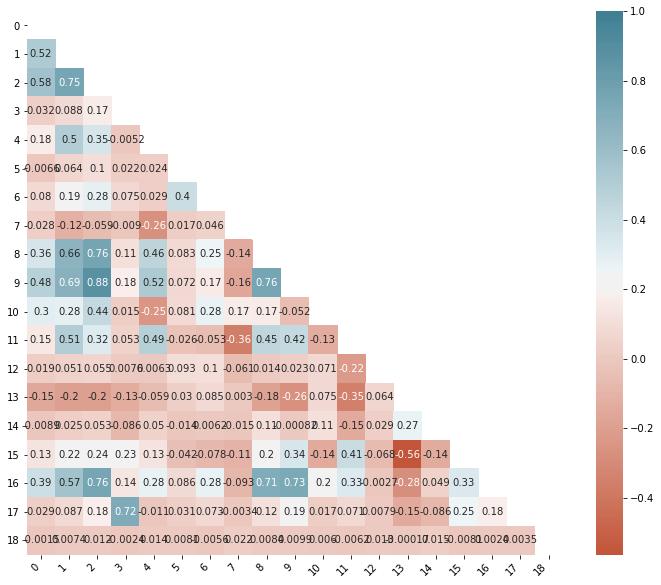

In [28]:
# Create heatmap using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pd.DataFrame(X).corr()
mask = np.zeros_like(cor, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
chart = sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200), mask=mask)#,cmap=plt.cm.Reds)
# Rotate labels on Y axis for better view
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
# Rotate labels on X axis for better view
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [29]:
df_X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date2'],
      dtype='object')

In [30]:
# Extract ndarray again after variables modifications
X = df_X.values

In our case PCA was not took good effect on overall model performance.

### Feature Scaling
To assure high performance of algorithms, data should be standarized - transform data to state with mean = 0 and STD = 1.

In [31]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X = sc_X.fit_transform(X)

In our case alorithm performed well without scaling.

### Oversampling
Oversampling technique used in this script is called SMOTE - Synthetic Minority Oversampling Technique. It generates additional artificial observations for underrepresented class, which are not redundant. This technique is based on measuring distances between actual observations, and generates observations not extremal, but in the middle of certain ranges dictated by existing observations characteristics.

In [32]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import imblearn
print(imblearn.__version__)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [33]:
len(X)

21613

In [34]:
# transform the dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

# summarize the new class distribution
counter = Counter(Y)
print(counter)

Counter({0: 20148, 1: 20148})


### Undersampling
Undersampling technique used in this script randomly deletes particular observations, which belong to more numerous represented class to make balance between classes. 

In [35]:
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state=42)
#X, Y = rus.fit_resample(X, Y)
#print('Resampled dataset shape %s' % Counter(Y))

## 3. Data modelling

For predicting houses price classes we need to use algorithm to solve classification problem.

For initial modelling we need to divide dataset to training and test part to properly measure models performance. We will use measure of accuracy and other scores. On further stages, we may use more sofisticated methods like cross validation to reduce uncertainty of measures.

In [36]:
# Divide on training and validation dataset
from sklearn.model_selection import train_test_split

# split data set into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10)
# ‘random_state’ just ensures that we get reproducible results every time.
# data - must be all X variables (pandas df / ndarray)
# target - must be Y variable (pandas df / ndarray)


### XGBoost

In [37]:
from xgboost import XGBClassifier
# Create and fit XGBoost model
model_01 = XGBClassifier()
model_01.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
# Predict values on test set
Y_pred_01 = model_01.predict(X_test)

## 4. Model evaluation

In this section classification model evaluation techniques are discussed.

In [39]:
from sklearn.metrics import confusion_matrix

# Distinguish unique values of target_test variable
unique, counts = np.unique(Y_test, return_counts=True)
for i in range(0,len(unique)):
    print(unique[i], ": ", counts[i])
# 0, 1 - and this is order of future conf matrix

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred_01)
cm

0 :  6040
1 :  6049


array([[5882,  158],
       [  98, 5951]], dtype=int64)

Above in the confusion matrix in first row we may see True Negatives, and False Positives,
in second row we may see False Negatives, True Positives.

#### Accuracy

In [40]:
# Accuracy (TP + TN) / (TP + TN + FP + FN )
(cm[0,0]+cm[1,1]) / sum(sum(cm))

0.978823724046654

#### Recall / Sensitivity / True Positive Rate
This index measure proportion of the number of all cases classified as ones (buildings which cost above $1 mln) to the number of all cases which are really ones. In another words it shows how sensitive model is in predicting positive values.

In [41]:
# True Positive Rate  TP / (TP + FN)
true_positive_rate = cm[1,1] / ( cm[1,1] + cm[1,0])
true_positive_rate

0.9837989750371963

#### Specificity / Selectivity / True Negative Rate
This index measure proportion of the number of all cases classified as zeros (building which cost below $1 mln), to the number of all cases which are really zeros. It shows how good the model is in predicting zero class values.

In [42]:
# True Negative Rate TN / (TN + FP)
true_negative_rate = cm[0,0] / ( cm[0,0] + cm[0,1])
true_negative_rate

0.973841059602649

#### Precision
It is used to anwer the question what proportion of positive identification was correct.

In [43]:
# Precision TP / (TP + FP)
precision = cm[1,1] / ( cm[1,1] + cm[0,1] )  
precision

0.9741365198886888

#### Compare actual and predicted value in table

In [44]:
Y_test_02 = np.expand_dims(Y_test, axis=0) # (added one more dim)
Y_pred_02 = np.expand_dims(Y_pred_01, axis=0) # (added one more dim)


In [45]:
Y_test_Y_pred_02 = np.concatenate((Y_test_02.T, Y_pred_02.T), axis=1)

In [46]:
Y_test_Y_pred_02[0:20]

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

## 5. Model hyperparameters optimization

For model hyperparameters optimization we will use Random Search combined with grid search. In addition to searching hyperspaces, we also incorporate cross-validation technique, to be more sure that our results for each set of hyperparameters are certain, and are not just matter of luck due to favourable division on training and test set.

In case of cross-validation we will have actually training set, validation set and test set. Before we had only training and test set.

Further training and validation sets in cross-validation are created from previous training set. And finally, model is tested on test set.

Lets check which evaluation scores are available in sklearn

In [47]:
# Show available metrics in sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### Cross-validation and random search hyperparameters optimization

Below, we use RandomizedSearchCV method from Scikit-learn package for XGBoost hyperparameters tuning. Metaheuristic method used in this case is Grid Search combined with Random Search, which allows us to randomly pick sets of parameters from given intervals and verify model performance. Model assessment is more stable due to cross-validation method, which divide our dataset on k-folds, test model performance on each on them, and compute mean value. This resampling method harness statistical robustness to assess how our model will behave on totally new datasets.

XGBoost alorithm is ensemble machine learning method - it uses a few machine learning techniques. Main technique is boosting, which means that it generates sequence of trees using different subsets of training set, and consecutive trees use information from previous trees. Below we will use implementation of the scikit-learn API for XGBoost. According to documentation algorithm has several dozen parameters: https://xgboost.readthedocs.io/en/latest/python/python_api.html.
Parameters choosen for optimization in this notebook are:
1. n_estimators (int) - number of trees generated in sequence
2. learning_rate (float) - Boosting learning rate (xgb’s “eta”)
3. subsample (float) - Subsample ratio of the training instance
4. max_depth (int) - Regularization parameter. Maximum tree depth for base learners. If lower parameter, trees are more shallow.
5. colsample_bytree (float) - Subsample ratio of columns when constructing each tree.
6. min_child_weight - (int) - Minimum sum of instance weight(hessian) needed in a child
7. gamma - (float) – Regularization parameter. "Minimum loss reduction required to make a further partition on a leaf node of the tree". In another words, in consecutive trees generation, higher loss reduction is needed to add forther nodes to trees. It makes trees more trimmed, less complex, less prone to overfitting. Another definiton of gamma parameter is "complexity cost by introducing additional leaf".


In [48]:
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import make_scorer


"""
Initial grid:

#param_distributions = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),  
              #'min_child_weight': [1, 2, 3],
              'gamma': [40, 50, 60]
             }
"""

# Defining parameters which we need to iterate over RS cycles
param_distributions = {'n_estimators': stats.randint(150, 1000), # 500 -> 1000
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),  
              #'min_child_weight': [1, 2, 3],
              'gamma': [0, 5, 10]
             }
# in frozen uniforms above eg. stats.randint(), first number 
# is lower boundary of range, and second is a bandwidth

# Initilize estimator
model_11 = XGBClassifier()

"""
rs = RandomizedSearchCV(model_11, param_distributions, n_iter=6, scoring='neg_mean_absolute_error', cv=4, 
                         verbose=4, n_jobs=-1, random_state=2019)
                         """

# Random Search CV setting
rs = RandomizedSearchCV(model_11, param_distributions, n_iter=100, scoring='accuracy', cv=8, 
                         verbose=4, n_jobs=-1, random_state=2019)
                        # n_iter - is the total iterations on hyperparameters dataset
                        # (Final results was produced setting up 1000 iterations over there)
                        # cv=4 - number of folds in Cross Validation 
                        # n_jobs=-1 - there will be all available cores used on a machine which run code
                        # verbose=4 - it displays additional information during optimization, if > 0

# Run Random Search with cross-validation
rs_results = rs.fit(X_train, Y_train)


Fitting 8 folds for each of 100 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 132.6min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed: 214.3min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 277.7min finished


#### Evaluation

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("BEST PARAMETERS: " + str(rs_results.best_params_))

print("\n(TP + TN) / (TP + FP + TN + FN)")
print("ACCURACY SCORE IN CV WITH BEST PARAMETERS: " + str(rs_results.best_score_))

# Predict with best parametrized model on training set
y_pred_train = rs.predict(X_train)
# Scoring on train set
score = accuracy_score(Y_train, y_pred_train)
print("\nAccuracy - SCORE ON TRAIN DATA: {}".format(score))

# Predict with best parametrized model on test set
y_pred = rs.predict(X_test)
# Scoring on test set
score = accuracy_score(Y_test, y_pred)
print("\nAccuracy - SCORE ON TEST DATA: {}".format(score))

# Recall = # True positives / # positives = TP / (TP+FN)
print("\n\nScore: Recall / Sensitivity / True Positive Rate")
print("TP / (TP + FN)")
score = recall_score(Y_train, y_pred_train)
print("\nRecall - SCORE ON TRAIN DATA: {}".format(score))
score = recall_score(Y_test, y_pred)
print("\nRecall - SCORE ON TEST DATA: {}".format(score))


print("\n\nScore: Specificity / Selectivity / True Negative Rate")
print("TN / (TN + FP)")
# Create confusion matrix
cm_train = confusion_matrix(Y_train, y_pred_train)
true_negative_rate_train = cm_train[0,0] / ( cm_train[0,0] + cm_train[0,1])
print("\nSpecificity - SCORE ON TRAIN DATA: {}".format(true_negative_rate_train))
# Create confusion matrix
cm_test = confusion_matrix(Y_test, y_pred)
true_negative_rate_test = cm_test[0,0] / ( cm_test[0,0] + cm_test[0,1])
print("\nSpecificity - SCORE ON TEST DATA: {}".format(true_negative_rate_test))


# Precision =# True positives / # predicted positive = TP/(TP+FP)
print("\n\nScore: Precision")
print("TP / (TP + FP)")
score = precision_score(Y_train, y_pred_train)
print("\nPrecision - SCORE ON TRAIN DATA: {}".format(score))
score = accuracy_score(Y_test, y_pred)
print("\nPrecision - SCORE ON TEST DATA: {}".format(score))



BEST PARAMETERS: {'colsample_bytree': 0.5801592275617389, 'gamma': 0, 'learning_rate': 0.019211647523942905, 'max_depth': 9, 'n_estimators': 899, 'subsample': 0.45934310408850854}

(TP + TN) / (TP + FP + TN + FN)
ACCURACY SCORE IN CV WITH BEST PARAMETERS: 0.9879817066685574

Accuracy - SCORE ON TRAIN DATA: 0.999680930265537

Accuracy - SCORE ON TEST DATA: 0.9892464223674414


Score: Recall / Sensitivity / True Positive Rate
TP / (TP + FN)

Recall - SCORE ON TRAIN DATA: 0.9996453649194978

Recall - SCORE ON TEST DATA: 0.9902463217060671


Score: Specificity / Selectivity / True Negative Rate
TN / (TN + FP)

Specificity - SCORE ON TRAIN DATA: 0.9997164729231641

Specificity - SCORE ON TEST DATA: 0.9882450331125828


Score: Precision
TP / (TP + FP)

Precision - SCORE ON TRAIN DATA: 0.9997162718116045

Precision - SCORE ON TEST DATA: 0.9892464223674414


### ROC Curve

ROC Curve is widely used technique to assess classification models. It uses sensitivity and specificity to make a 2d picture showing model performance in context of this two measures.

roc_auc_score for XGBoost:  0.9892456774093249


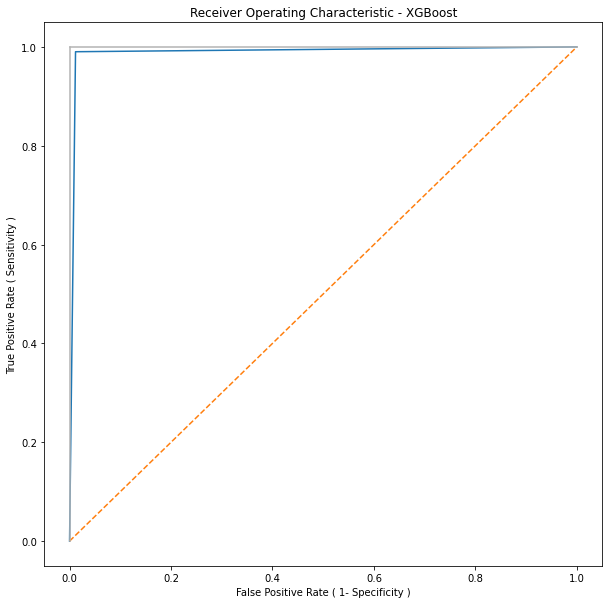

In [50]:
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred)
#false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_pred)
print('roc_auc_score for XGBoost: ', roc_auc_score(Y_test, y_pred))
#print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate ( Sensitivity )')
plt.xlabel('False Positive Rate ( 1- Specificity )')
plt.show()

#plt.subplots(1, figsize=(10,10))
#plt.title('XXX - Logistic regression')
#plt.plot(false_positive_rate2, true_positive_rate2)
#plt.plot([0, 1], ls="--")
#plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

ROC - Receiver Operating Characteristic - is a measure of model ability to separate between classes.
If the curve is more close to the left-top corner - the model is more accurate, closest to the diagonal line - less accurate (this is not classic accuracy measure). In other words AUC - Area Under Curve is a measure of trade off between True Positive Rate (recall) and False Positive Rate.

If the blue line is more closer to the top horizontal edge, the model is more sensitive and better recognize positive class.
If the blue line is more closer to the left vertical edge, the model is better in recognize negative class.

In our case we may see that model is pretty balanced and has pretty AUC - so high accuracy.

Without oversampling we could see high disproportion, that model is good in recognizing negative cases, because it is a lot more data for this class, but not that good in recognize positive class - because there are not many houses which cost over $1 million in our dataset. 

# Results

#### Best results with SMOTE oversampling

BEST PARAMETERS: {'colsample_bytree': 0.5801592275617389, 'gamma': 0, 'learning_rate': 0.019211647523942905, 'max_depth': 9, 'n_estimators': 899, 'subsample': 0.45934310408850854}

Score: Accuracy:  (TP + TN) / (TP + FP + TN + FN)

ACCURACY SCORE IN CV WITH BEST PARAMETERS: 0.9879817066685574

Accuracy - SCORE ON TRAIN DATA: 0.999680930265537

Accuracy - SCORE ON TEST DATA: 0.9892464223674414

<br>
Score: Recall / Sensitivity / True Positive Rate:  TP / (TP + FN)

Recall - SCORE ON TRAIN DATA: 0.9996453649194978

Recall - SCORE ON TEST DATA: 0.9902463217060671

<br>
Score: Specificity / Selectivity / True Negative Rate:  TN / (TN + FP)

Specificity - SCORE ON TRAIN DATA: 0.9997164729231641

Specificity - SCORE ON TEST DATA: 0.9882450331125828

<br>
Score: Precision:  TP / (TP + FP)

Precision - SCORE ON TRAIN DATA: 0.9997162718116045

Precision - SCORE ON TEST DATA: 0.9892464223674414


<br>

#### Undersampling

BEST PARAMETERS: {'colsample_bytree': 0.7866201873837433, 'gamma': 5, 'learning_rate': 0.037617693595030345, 'max_depth': 7, 'n_estimators': 466, 'subsample': 0.7950384782010731}
(TP + TN) / (TP + FP + TN + FN)

ACCURACY SCORE IN CV WITH BEST PARAMETERS: 0.9414919551438323

Accuracy - SCORE ON TRAIN DATA: 0.9746465138956607

Accuracy - SCORE ON TEST DATA: 0.9488054607508533

Precision - SCORE ON TRAIN DATA: 0.9651272384542884

Precision - SCORE ON TEST DATA: 0.9488054607508533

Recall - SCORE ON TRAIN DATA: 0.9855630413859481

Recall - SCORE ON TEST DATA: 0.9624413145539906


<br>

#### No resampling

BEST PARAMETERS: {'colsample_bytree': 0.9070192996649188, 'gamma': 5, 'learning_rate': 0.0760444555602527, 'max_depth': 7, 'n_estimators': 432, 'subsample': 0.8924085676686173}
(TP + TN) / (TP + FP + TN + FN)

ACCURACY SCORE IN CV WITH BEST PARAMETERS: 0.9750809703218983

Accuracy - SCORE ON TRAIN DATA: 0.9894242844867474

Accuracy - SCORE ON TEST DATA: 0.9764034546576188

Precision - SCORE ON TRAIN DATA: 0.9472049689440993

Precision - SCORE ON TEST DATA: 0.9764034546576188

Recall - SCORE ON TRAIN DATA: 0.8935546875

Recall - SCORE ON TEST DATA: 0.746031746031746




### Results analysis

Analysing results we may see that Accuracy Score with oversampling technique after 8-fold crossvalidation is 0.98798. So approximately 99 on 100 cases of classification are done properly. Accuracy score on test set is 0.98924. This is an indication of high certainty of CV score to predict model performance on future unseen datasets. Recall on the test set is 0.99024, precision 0.98924, specificity 0.988245. Levels of this scores may tell us, model is similarly good at recognizing Zero class - houses below or equal to \\$ 1 mln, and One class - houses above \\$ 1 mln, even slightly better in recognizing One class.

Techniques which resulted in improvements on test set:
1. added basic hyperparameters tuning
2. added date variable binned into months
3. oversampling (overall improvement) <- technique was choosen instead of undersampling
4. undersampling (worse accuracy, but better recall and precision - better recognition of Ones)
5. longer hyperparameters tuning

Used methods which not resulted in improvements: 
1. Removing features with lowest importances levels
2. PCA on strongly correlated variables
3. Data whitening (rescaling features to remove correlation from dataset)

### Afterword

In the future more tasks may be done to inscrease performance:
1. Experiment with increasing number of iterations in random-grid search
2. Experiment with more advanced meta-heuristic search methods
3. Experiment with expanding parameters range during optimization
4. Study deeper XGBoost architecture to get more ideas how to improve it (for example tune additional parameters which may be important)
5. Test another algorithms like Artficial Neural Network 
6. Experiment with dummy variables
    


### Reproducibility Note
**Libraries used in the notebook:**

scipy==1.4.1

scikit-learn==0.21.0

numpy==1.18.2

xgboost==0.90

seaborn==0.10.0

pandas==1.0.3

matplotlib==3.2.1

imblearn==0.5.0

In [8]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn",
            "imblearn": "imbalanced-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))


pandas==1.0.3
imbalanced-learn==0.5.0


In [4]:
import pandas

In [5]:
import imblearn

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi